In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Project 6: Image Processing Tools (Thresholding & Histograms)

---

### 6.1 Overview
In this project, we analyze a low-contrast satellite image showing water bodies and clouds. We'll use histogram analysis, histogram equalization, and automatic thresholding to enhance contrast and segment different regions.

### 6.2 Objectives

- Analyze the initial histogram to understand pixel value distribution
- Apply histogram equalization to improve contrast
- Use Otsu's automatic thresholding to separate clouds from water/land
- Compare before and after results
  
### 6.3 Step 1: Load and Display the Satellite Image

Image dimensions: 1800 x 1400
Min pixel value: 0
Max pixel value: 255


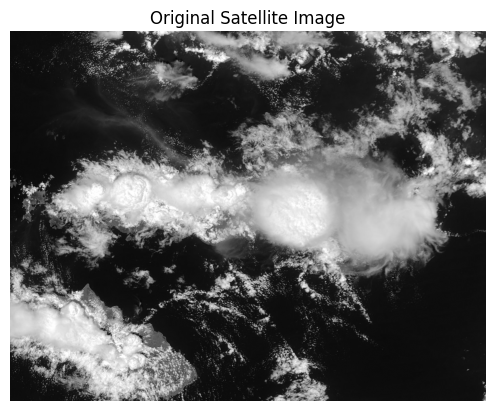

In [2]:
# Load the satellite image
image = cv2.imread("./images/satellite-image.jpg",cv2.IMREAD_GRAYSCALE)

# Display Images
plt.title("Original Satellite Image")
plt.axis("off")
plt.imshow(image, cmap="gray")

# Get image dimensions
height, width = image.shape
print(f"Image dimensions: {width} x {height}")
print(f"Min pixel value: {image.min()}")
print(f"Max pixel value: {image.max()}")

### 6.4 Step 2: Analyze the Initial Histogram

C:\Users\hp\AppData\Local\Temp\ipykernel_5852\631682127.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(image.ravel(),256,[0,256])



📊 Histogram Analysis:
Occupied pixel range: 0 - 255
Range used: 255 out of 255 possible values
Percentage of full range: 100.0%


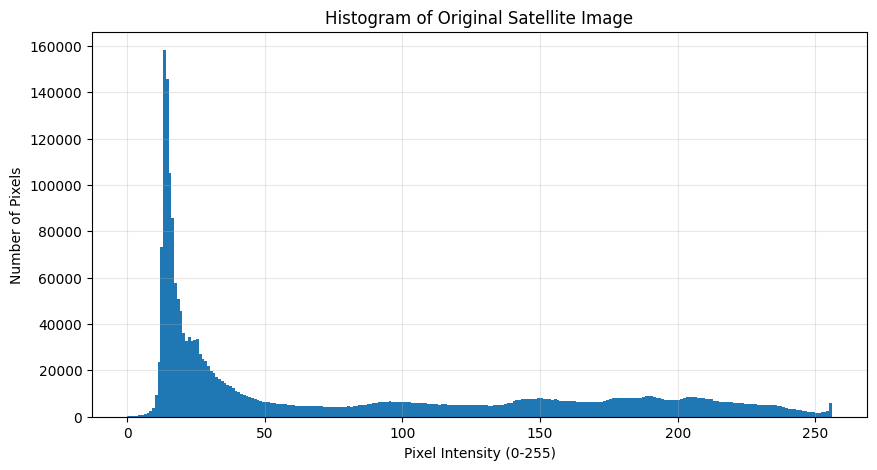

In [3]:
# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(image.ravel(),256,[0,256])
plt.title("Histogram of Original Satellite Image")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Number of Pixels")
plt.grid(True, alpha=0.3)

# Analyze pixel value range
min_pixel = image.min()
max_pixel = image.max()

print(f"\n📊 Histogram Analysis:")
print(f"Occupied pixel range: {min_pixel} - {max_pixel}")
print(f"Range used: {max_pixel - min_pixel} out of 255 possible values")
print(f"Percentage of full range: {((max_pixel - min_pixel) / 255 * 100):.1f}%")

### 6.5 Step 3: Apply Histogram Equalization

C:\Users\hp\AppData\Local\Temp\ipykernel_5852\1115541183.py:34: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(transformed.ravel(), 256, [0,256])


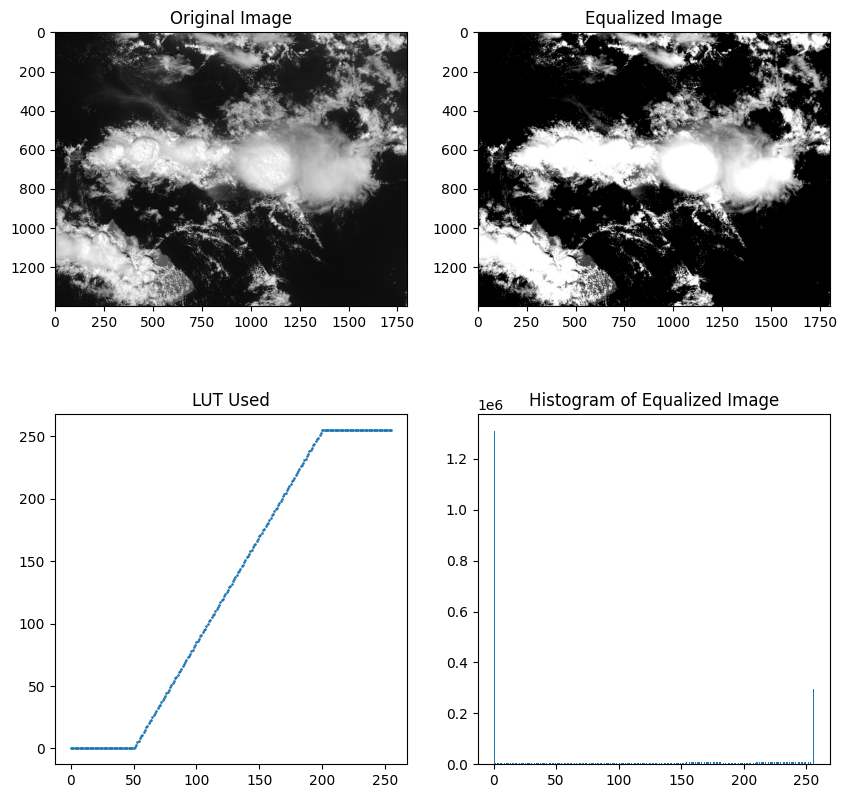

In [4]:
def lut_chart(image, lut):
    """ Applies a LUT to an image and shows the result.

        Args:
            image: Input image to be modified.
            lut: a 256 elements array representing a LUT, where
                indices index input values, and their content the
                output ones.
    """
    
    plt.figure(figsize=(10, 10))
    
    # Show the initial image
    plt.subplot(2,2,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    
    # Apply LUT
    transformed = lut[image]

    # Show the resultant one
    plt.subplot(2,2,2)
    plt.title("Equalized Image")
    plt.imshow(transformed, cmap='gray')

    # Plot the used LUT
    plt.subplot(2,2,3)
    plt.title("LUT Used")
    plt.scatter(np.arange(0,256,1), lut, s=0.85)

    # And finally, the resultant histogram
    plt.subplot(2,2,4)
    plt.title("Histogram of Equalized Image")
    plt.hist(transformed.ravel(), 256, [0,256])
    
    return transformed


# slope a
slope = (255-0) / (200-50)
# intercept b
intercept = -slope * 50
# generate lut
lut_1 = slope * np.arange(0, 256)   + intercept
lut_1 = np.clip(lut_1, 0, 255).astype(np.uint8)


equalized_image=lut_chart(image, lut_1)

### 6.6 Step 5: Apply Otsu's Automatic Thresholding

**What is Otsu's Method?**

Otsu's method is an automatic thresholding technique that finds the optimal threshold value to separate an image into two classes (foreground and background).


🎯 Otsu's Threshold Value: 110.0
Pixels below 110.0 → BLACK (water/land)
Pixels above 110.0 → WHITE (clouds)


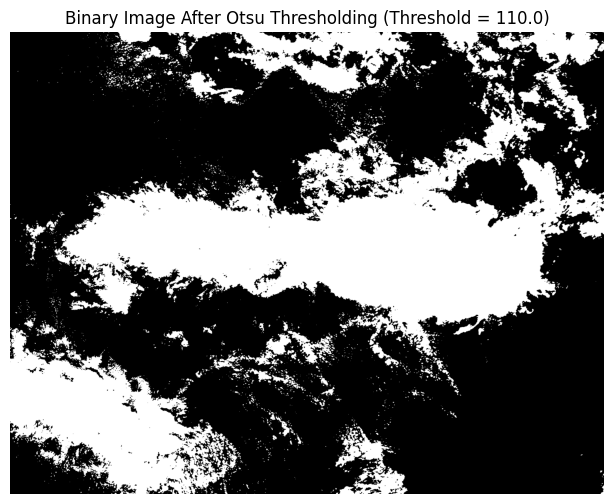

In [5]:
# Apply Otsu's thresholding
# Otsu's method automatically finds the optimal threshold value
# to separate the image into two classes (clouds vs water/land)

# cv2.threshold() returns:
# - threshold_value: The optimal threshold found by Otsu
# - binary_image: The resulting binary image (0 or 255)

threshold_value, binary_image = cv2.threshold(
    equalized_image, 
    0,  # Initial threshold (ignored when using OTSU)
    255,  # Maximum value
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

print(f"\n🎯 Otsu's Threshold Value: {threshold_value:.1f}")
print(f"Pixels below {threshold_value:.1f} → BLACK (water/land)")
print(f"Pixels above {threshold_value:.1f} → WHITE (clouds)")

# Display the binary result
plt.figure(figsize=(10, 6))
plt.imshow(binary_image, cmap='gray')
plt.title(f"Binary Image After Otsu Thresholding (Threshold = {threshold_value:.1f})")
plt.axis("off")
plt.show()

### 6.7 Step 6: Complete Before/After Comparison

C:\Users\hp\AppData\Local\Temp\ipykernel_5852\985657684.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  axes[0, 1].hist(image.ravel(), 256, [0, 256], color='darkblue')


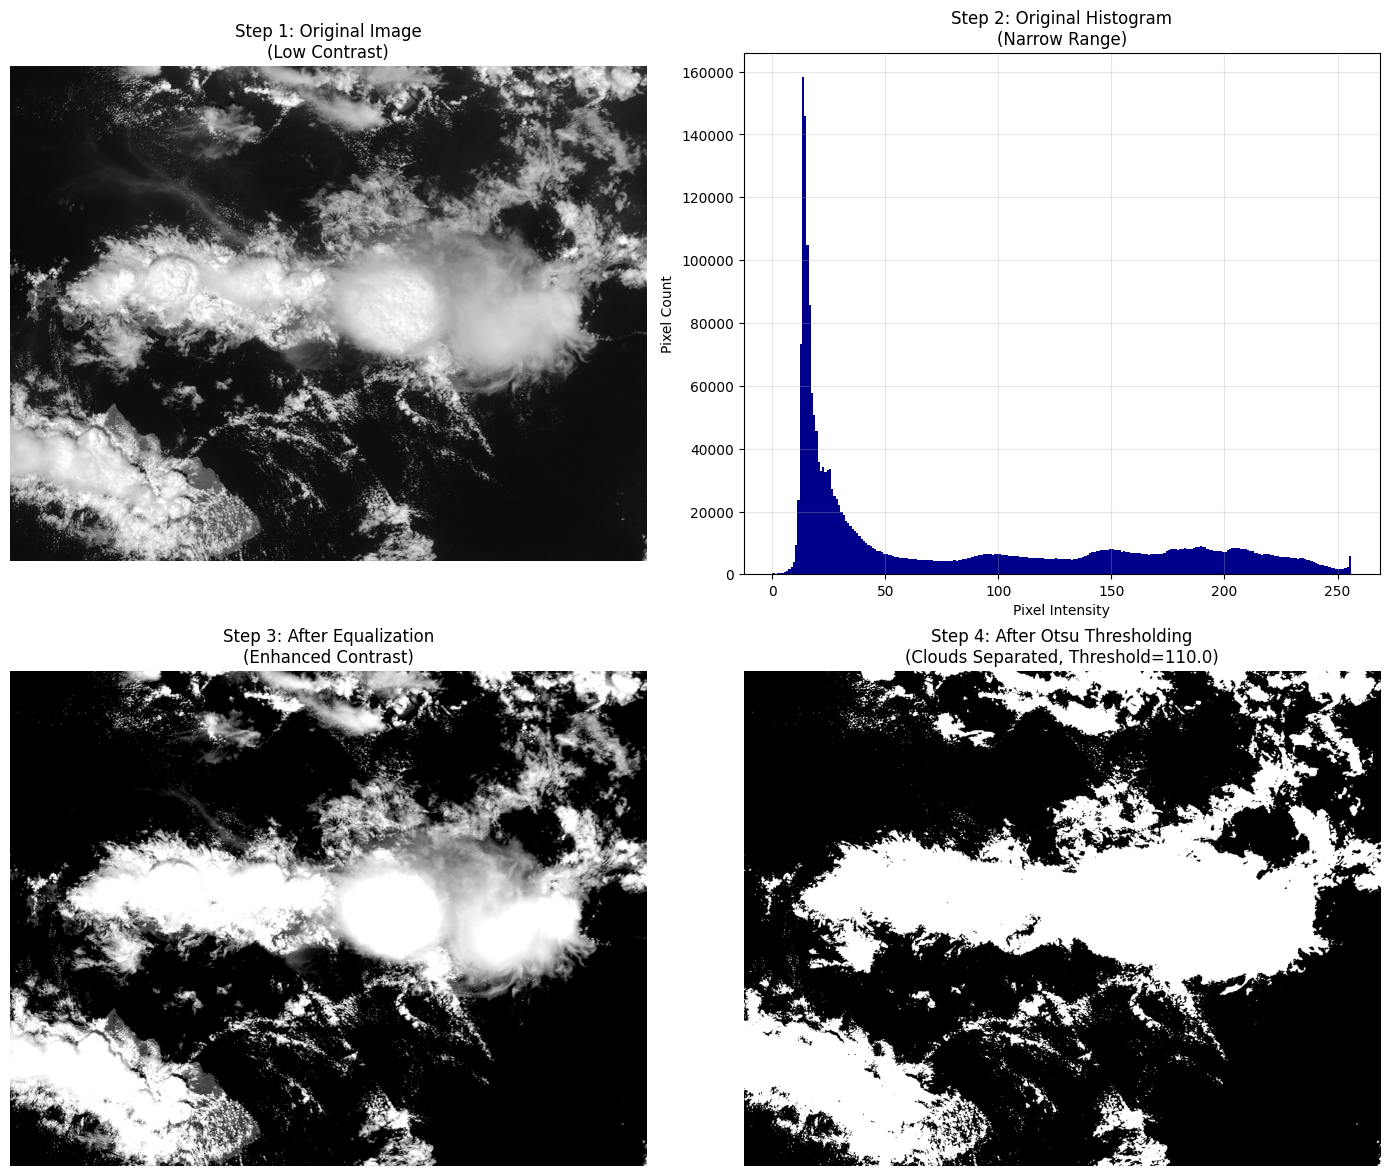

In [6]:
# Create a comprehensive comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Row 1, Col 1: Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Step 1: Original Image\n(Low Contrast)")
axes[0, 0].axis("off")

# Row 1, Col 2: Original histogram
axes[0, 1].hist(image.ravel(), 256, [0, 256], color='darkblue')
axes[0, 1].set_title("Step 2: Original Histogram\n(Narrow Range)")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Pixel Count")
axes[0, 1].grid(True, alpha=0.3)

# Row 2, Col 1: Equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title("Step 3: After Equalization\n(Enhanced Contrast)")
axes[1, 0].axis("off")

# Row 2, Col 2: Binary image
axes[1, 1].imshow(binary_image, cmap='gray')
axes[1, 1].set_title(f"Step 4: After Otsu Thresholding\n(Clouds Separated, Threshold={threshold_value:.1f})")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

### 6.8 Bonus: Applying Threshold to Original Image (Without Equalization)

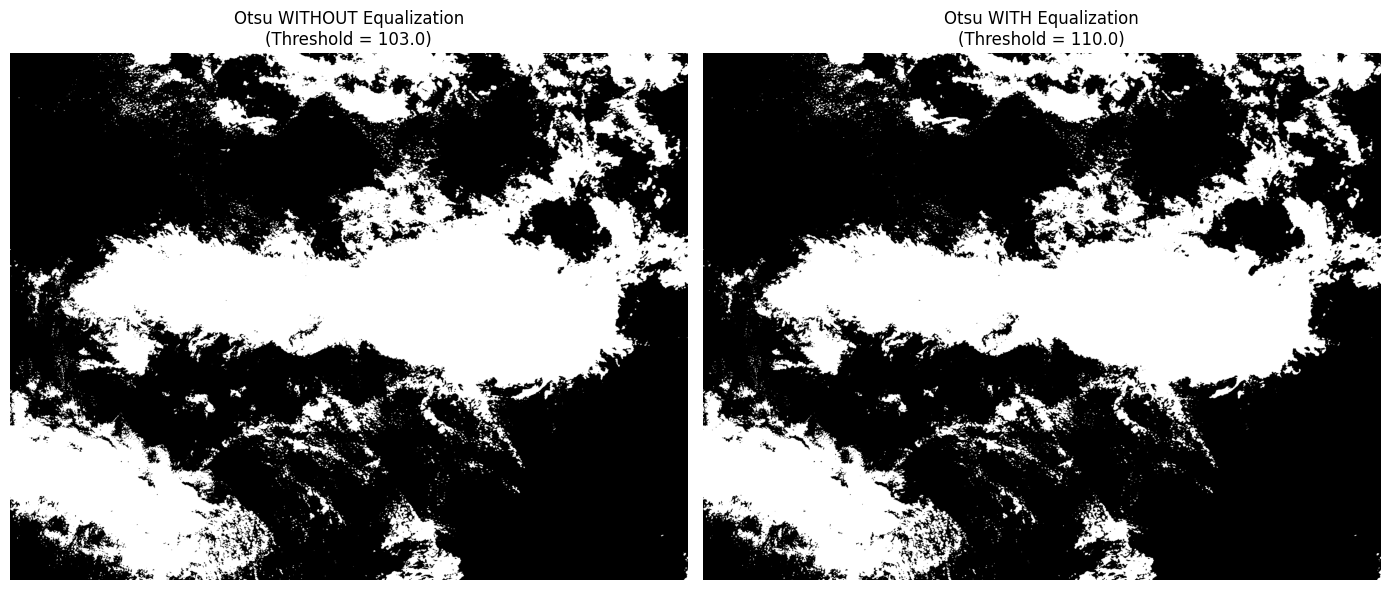


🔍 Comparison:
Threshold on original image: 103.0
Threshold after equalization: 110.0
Difference: 7.0

📊 Conclusion: Equalization significantly improves the separation quality!
The binary mask after equalization shows clearer distinction between clouds and water/land.


In [7]:
# Apply Otsu directly to the original low-contrast image
threshold_value_original, binary_original = cv2.threshold(
    image,
    0,
    255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# Compare: Thresholding with vs without equalization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Without equalization
axes[0].imshow(binary_original, cmap='gray')
axes[0].set_title(f"Otsu WITHOUT Equalization\n(Threshold = {threshold_value_original:.1f})")
axes[0].axis("off")

# With equalization
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title(f"Otsu WITH Equalization\n(Threshold = {threshold_value:.1f})")
axes[1].axis("off")

plt.tight_layout()
plt.show()

print("\n🔍 Comparison:")
print(f"Threshold on original image: {threshold_value_original:.1f}")
print(f"Threshold after equalization: {threshold_value:.1f}")
print(f"Difference: {abs(threshold_value - threshold_value_original):.1f}")
print("\n📊 Conclusion: Equalization significantly improves the separation quality!")
print("The binary mask after equalization shows clearer distinction between clouds and water/land.")